In [124]:
!pip3 install pandas
!pip3 install duckdb
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install plotly


In [125]:
import pandas as pd
import duckdb as db 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as ply

In [126]:
data = pd.read_csv("sample_social_media_data.csv")
data

,id,platform,username,post_date,content,likes,comments,shares
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9
...,...,...,...,...,...,...,...,...
2995,2996,Twitter,walkerthomas,2023-10-31 05:45:03,Argue fall from degree.,82,38,20
2996,2997,Facebook,shieldsnicholas,2023-09-01 23:45:03,Bank effort return glass number foot.,245,14,19
2997,2998,Twitter,christinasaunders,2023-09-04 00:45:03,Lead a with physical south arm crime.,146,38,23
2998,2999,Instagram,destinyharris,2023-11-08 19:45:03,Consumer especially support decision quality c...,150,6,5


In [127]:
data.isnull().sum()

id           0
platform     0
username     0
post_date    0
content      0
likes        0
comments     0
shares       0
dtype: int64

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3000 non-null   int64 
 1   platform   3000 non-null   object
 2   username   3000 non-null   object
 3   post_date  3000 non-null   object
 4   content    3000 non-null   object
 5   likes      3000 non-null   int64 
 6   comments   3000 non-null   int64 
 7   shares     3000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 187.6+ KB


Engagement pada jam-jam tertentu dalam sehari

In [129]:
import datetime
import dateutil

def parse_date(column_value:str) -> datetime.datetime:
    return dateutil.parser.parse(column_value)
data['post_date'] = data['post_date'].apply(parse_date)

In [130]:
data['hour'] = data['post_date'].dt.time
data

,id,platform,username,post_date,content,likes,comments,shares,hour
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14,07:45:03
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29,07:45:03
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24,03:45:03
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13,17:45:03
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9,01:45:03
...,...,...,...,...,...,...,...,...,...
2995,2996,Twitter,walkerthomas,2023-10-31 05:45:03,Argue fall from degree.,82,38,20,05:45:03
2996,2997,Facebook,shieldsnicholas,2023-09-01 23:45:03,Bank effort return glass number foot.,245,14,19,23:45:03
2997,2998,Twitter,christinasaunders,2023-09-04 00:45:03,Lead a with physical south arm crime.,146,38,23,00:45:03
2998,2999,Instagram,destinyharris,2023-11-08 19:45:03,Consumer especially support decision quality c...,150,6,5,19:45:03


In [131]:
hour_range_array = []
for index,column in data.iterrows():
    hour = column['hour'].hour
    if 0 <= hour < 4:
        hour_range_array.append("00 - 04")
    elif 4 <= hour < 8:
        hour_range_array.append("04 - 08")
    elif 8 <= hour < 12:
        hour_range_array.append("08 - 12")
    elif 12 <= hour < 16:
        hour_range_array.append("12 - 16")
    elif 16 <= hour < 20:
        hour_range_array.append("16 - 20")
    elif 20 <= hour < 24:
        hour_range_array.append("20 - 24")
data['hour_range'] = hour_range_array
    

In [132]:
new_data = data.groupby("hour_range")[['likes', 'comments', 'shares']].sum()
new_data

,likes,comments,shares
hour_range,,,
00 - 04,76405,12696,7832
04 - 08,80620,12579,7778
08 - 12,72483,12287,7235
12 - 16,84376,13607,8099
16 - 20,73190,12474,7529
20 - 24,77123,12815,7541


In [133]:
new_data = new_data.reset_index().melt(id_vars="hour_range", value_vars=['likes', 'comments', 'shares'], var_name='metric', value_name='sum')
new_data

,hour_range,metric,sum
0,00 - 04,likes,76405
1,04 - 08,likes,80620
2,08 - 12,likes,72483
3,12 - 16,likes,84376
4,16 - 20,likes,73190
5,20 - 24,likes,77123
6,00 - 04,comments,12696
7,04 - 08,comments,12579
8,08 - 12,comments,12287
9,12 - 16,comments,13607


<Axes: xlabel='hour_range', ylabel='sum'>

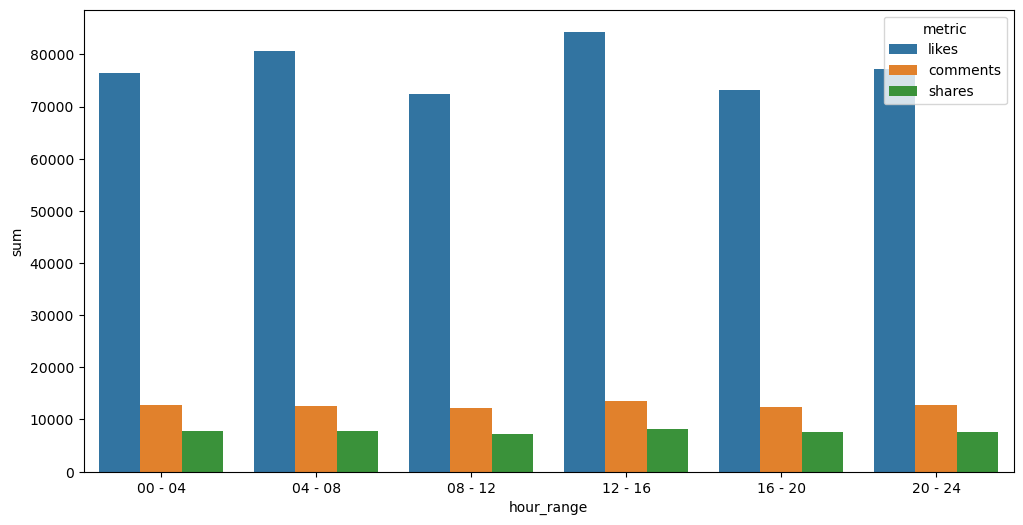

In [134]:
plt.figure(figsize=(12,6))
sns.barplot(data=new_data,x='hour_range', y='sum', hue='metric')

Statistik deskriptif

In [135]:
data.describe()

,id,post_date,likes,comments,shares
count,3000.000000,3000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2023-06-02 07:35:57,154.732333,25.486000,15.338000
min,1.000000,2022-12-04 00:45:03,10.000000,1.000000,1.000000
25%,750.750000,2023-03-03 01:15:03,81.000000,13.000000,8.000000
50%,1500.500000,2023-06-05 13:45:03,155.000000,26.000000,15.000000
75%,2250.250000,2023-08-31 01:45:03,227.000000,38.000000,23.000000
max,3000.000000,2023-12-03 13:45:03,300.000000,50.000000,30.000000
std,866.169729,NaN,84.139546,14.503514,8.722487


Korelasi antara panjang teks postingan dengan jumlah interaksi

In [136]:
len_arr = []
interaction_sum_arr = []
for index,column in data.iterrows():
    len_arr.append(len(column['content']))
    interaction_sum_arr.append(column['likes']+column['comments']+column['shares'])
data['length'] = len_arr
data['interaction'] = interaction_sum_arr

In [137]:
data

,id,platform,username,post_date,content,likes,comments,shares,hour,hour_range,length,interaction
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14,07:45:03,04 - 08,28,46
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29,07:45:03,04 - 08,38,210
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24,03:45:03,00 - 04,47,342
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13,17:45:03,16 - 20,41,76
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9,01:45:03,00 - 04,45,27
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Twitter,walkerthomas,2023-10-31 05:45:03,Argue fall from degree.,82,38,20,05:45:03,04 - 08,23,140
2996,2997,Facebook,shieldsnicholas,2023-09-01 23:45:03,Bank effort return glass number foot.,245,14,19,23:45:03,20 - 24,37,278
2997,2998,Twitter,christinasaunders,2023-09-04 00:45:03,Lead a with physical south arm crime.,146,38,23,00:45:03,00 - 04,37,207
2998,2999,Instagram,destinyharris,2023-11-08 19:45:03,Consumer especially support decision quality c...,150,6,5,19:45:03,16 - 20,60,161


In [138]:
len_range_arr = []
for index,column in data.iterrows():
    if column['length'] < 20:
        len_range_arr.append('< 20')
    elif 20 <= column['length'] < 30:
        len_range_arr.append('20 - 29')
    elif 30 <= column['length'] < 40:
        len_range_arr.append('30 - 39')
    elif 40 <= column['length'] < 50:
        len_range_arr.append("40 - 49")
    elif 50 <= column['length'] < 60:
        len_range_arr.append('50 - 59')
    elif 60 <= column['length'] < 70:
        len_range_arr.append('60 - 69')
    elif 70 <= column['length'] < 80:
        len_range_arr.append('70 - 79')
data['length_range'] = len_range_arr


In [139]:
new_data = data.groupby('length_range')['id'].count()
order = ['< 20', '20 - 29', '30 - 39', "40 - 49", '50 - 59', '60 - 69', '70 - 79']
new_data = new_data.reindex(order)
new_data

length_range
< 20       173
20 - 29    776
30 - 39    953
40 - 49    765
50 - 59    294
60 - 69     38
70 - 79      1
Name: id, dtype: int64

<Axes: xlabel='length_range'>

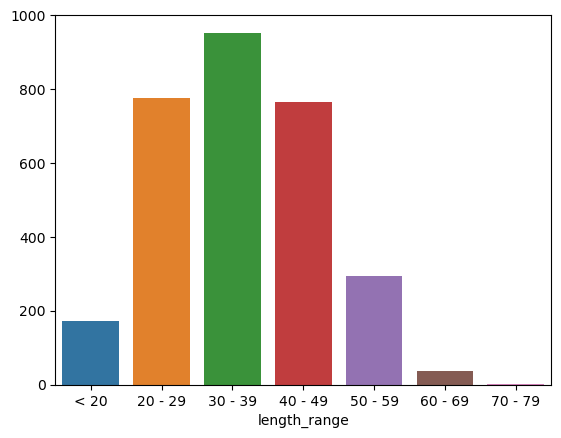

In [140]:
sns.barplot(x= new_data.index, y=new_data.values)

In [141]:
data[['length', 'interaction']].corr()

,length,interaction
length,1.000000,0.011999
interaction,0.011999,1.000000


Pengguna yang memiliki jumlah interaksi terbesar 

In [142]:
data.sort_values(by='interaction', ascending=False).head(5)

,id,platform,username,post_date,content,likes,comments,shares,hour,hour_range,length,interaction,length_range
2683,2684,Instagram,kelly31,2023-05-06 15:45:03,Produce institution list degree.,296,45,30,15:45:03,12 - 16,32,371,30 - 39
2939,2940,Instagram,carl60,2023-11-13 16:45:03,Indeed national near forward.,299,50,22,16:45:03,16 - 20,29,371,20 - 29
2555,2556,Facebook,randymeyers,2022-12-14 18:45:03,Next short history forward suggest gas.,299,44,27,18:45:03,16 - 20,39,370,30 - 39
2486,2487,Twitter,josephmaxwell,2023-04-21 07:45:03,Break get look lead.,290,48,30,07:45:03,04 - 08,20,368,20 - 29
1317,1318,Instagram,bbell,2023-11-02 12:45:03,Thousand wide matter.,299,42,25,12:45:03,12 - 16,21,366,20 - 29
